In [10]:
# Cell 1: Import Library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Mengimpor dataset
df = pd.read_csv("data/dataset_siswa.csv")

# Memeriksa apakah ada missing values di dataset
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# Jika ada missing values, kita bisa mengisinya dengan rata-rata kolom masing-masing
df['absensi'] = df['absensi'].fillna(df['absensi'].mean())
df['nilai'] = df['nilai'].fillna(df['nilai'].mean())

# Memeriksa kembali setelah pengisian missing values
print("\nDataset Setelah Penanganan Missing Values:")
print(df.isnull().sum())

# Menampilkan informasi dasar dari dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif untuk atribut numerik
print("\nStatistik Deskriptif Dataset:")
print(df.describe())



Missing Values per Kolom:
nomor_id    0
absensi     0
nilai       0
dtype: int64

Dataset Setelah Penanganan Missing Values:
nomor_id    0
absensi     0
nilai       0
dtype: int64

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nomor_id  150 non-null    object
 1   absensi   150 non-null    int64 
 2   nilai     150 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB
None

Statistik Deskriptif Dataset:
          absensi       nilai
count  150.000000  150.000000
mean    72.260000   71.446667
std     18.785411   17.711914
min     10.000000   16.000000
25%     61.000000   60.250000
50%     73.000000   72.000000
75%     88.000000   83.750000
max    100.000000  100.000000


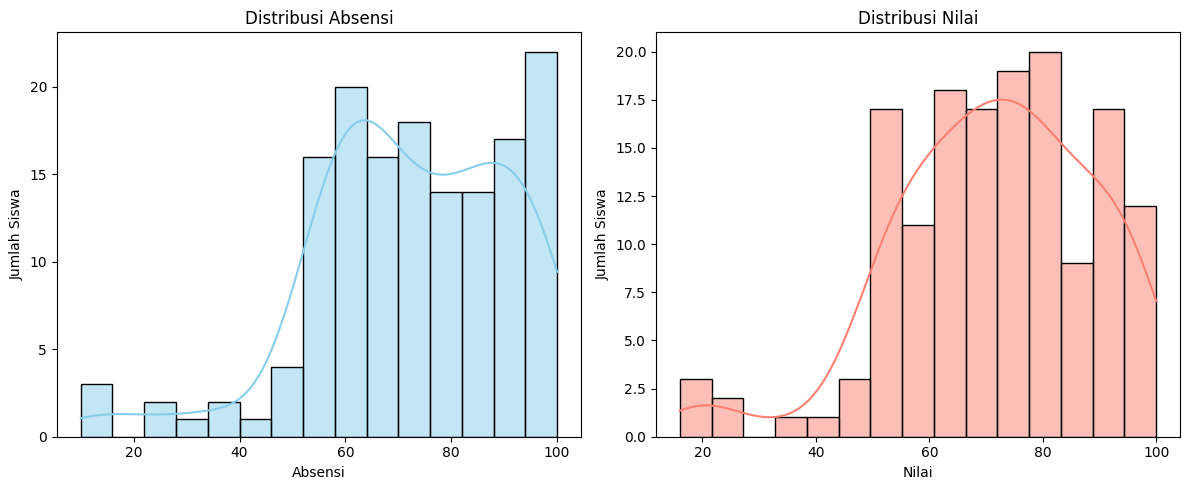

In [12]:
# Cell 3: Visualisasi Distribusi Data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['absensi'], kde=True, bins=15, color='skyblue')
plt.title('Distribusi Absensi')
plt.xlabel('Absensi')
plt.ylabel('Jumlah Siswa')

plt.subplot(1,2,2)
sns.histplot(df['nilai'], kde=True, bins=15, color='salmon')
plt.title('Distribusi Nilai')
plt.xlabel('Nilai')
plt.ylabel('Jumlah Siswa')
plt.tight_layout()
plt.show()

In [13]:
# Fungsi untuk mengkategorikan performa berdasarkan nilai dan absensi
def categorize_performance(row):
    if row['nilai'] < 50 and row['absensi'] < 50:
        return 'Buruk'
    elif (50 <= row['nilai'] <= 75) or (50 <= row['absensi'] <= 75):
        return 'Cukup'
    elif row['nilai'] > 75 and row['absensi'] > 75:
        return 'Bagus'

# Menambahkan kolom 'performa' berdasarkan kategori
df['performa'] = df.apply(categorize_performance, axis=1)

# Menampilkan contoh dataset setelah penambahan kolom performa
print("\nContoh Data Setelah Prapemrosesan:")
print(df.head(20))


Contoh Data Setelah Prapemrosesan:
   nomor_id  absensi  nilai performa
0     S1000       97     83    Bagus
1     S1001       98     92    Bagus
2     S1002      100     94    Bagus
3     S1003       90     51    Cukup
4     S1004       59     91    Cukup
5     S1005       61     93    Cukup
6     S1006       67     80    Cukup
7     S1007       44     33    Buruk
8     S1008       98     56    Cukup
9     S1009       35     23    Buruk
10    S1010       86     75    Cukup
11    S1011       24     41    Buruk
12    S1012       95     90    Bagus
13    S1013       91     75    Cukup
14    S1014       58     89    Cukup
15    S1015       15     45    Buruk
16    S1016       64     79    Cukup
17    S1017       54     61    Cukup
18    S1018       33     18    Buruk
19    S1019       83     58    Cukup


C:\Users\muham\AppData\Local\Temp\ipykernel_5156\3199730603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performa', data=df, palette='Set2')


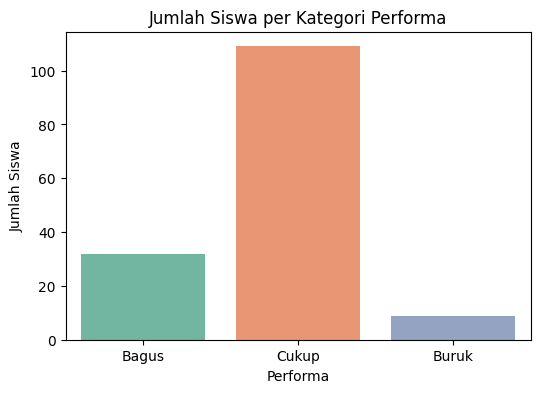

In [14]:
# Cell 5: Visualisasi Kategori Performa
plt.figure(figsize=(6,4))
sns.countplot(x='performa', data=df, palette='Set2')
plt.title('Jumlah Siswa per Kategori Performa')
plt.xlabel('Performa')
plt.ylabel('Jumlah Siswa')
plt.show()

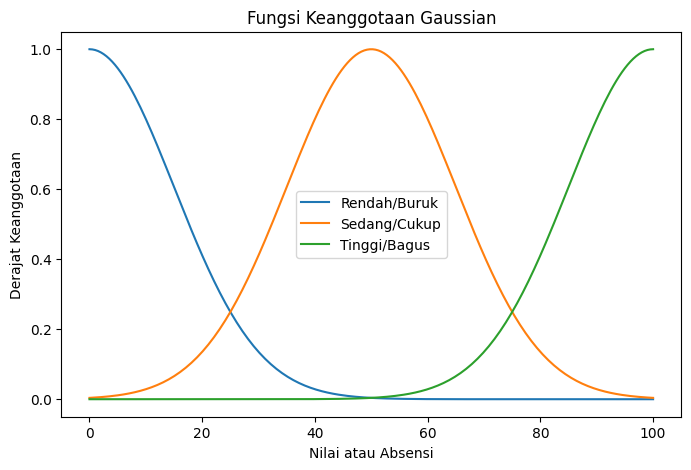

In [15]:
# Fungsi Keanggotaan Gaussian
def gaussian_membership(x, center, sigma):
    return np.exp(-0.5 * ((x - center) / sigma) ** 2)
x = np.linspace(0, 100, 200)
plt.figure(figsize=(8,5))
plt.plot(x, [gaussian_membership(i, 0, 15) for i in x], label='Rendah/Buruk')
plt.plot(x, [gaussian_membership(i, 50, 15) for i in x], label='Sedang/Cukup')
plt.plot(x, [gaussian_membership(i, 100, 15) for i in x], label='Tinggi/Bagus')
plt.title('Fungsi Keanggotaan Gaussian')
plt.xlabel('Nilai atau Absensi')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.show()

In [16]:

# Fungsi untuk menghitung performa berdasarkan Mamdani
def mamdani(absensi, nilai):
    # Fungsi keanggotaan untuk absensi dan nilai
    absensi_rendah = gaussian_membership(absensi, 0, 15)
    absensi_sedang = gaussian_membership(absensi, 50, 15)
    absensi_tinggi = gaussian_membership(absensi, 100, 15)

    nilai_buruk = gaussian_membership(nilai, 0, 15)
    nilai_cukup = gaussian_membership(nilai, 50, 15)
    nilai_bagus = gaussian_membership(nilai, 100, 15)

    # Aturan fuzzy Mamdani
    if absensi_rendah > 0.5 and nilai_buruk > 0.5:
        return "Buruk"
    elif absensi_tinggi > 0.5 and nilai_bagus > 0.5:
        return "Bagus"
    elif absensi_sedang > 0.5 and nilai_cukup > 0.5:
        return "Cukup"
    else:
        return "Cukup"

# Fungsi untuk menghitung performa berdasarkan Sugeno
def sugeno(absensi, nilai):
    # Fungsi keanggotaan untuk absensi dan nilai
    absensi_rendah = gaussian_membership(absensi, 0, 15)
    absensi_sedang = gaussian_membership(absensi, 50, 15)
    absensi_tinggi = gaussian_membership(absensi, 100, 15)

    nilai_buruk = gaussian_membership(nilai, 0, 15)
    nilai_cukup = gaussian_membership(nilai, 50, 15)
    nilai_bagus = gaussian_membership(nilai, 100, 15)

    # Aturan fuzzy Sugeno dengan output numerik
    if absensi_rendah > 0.5 and nilai_buruk > 0.5:
        return 0  # Performa Buruk
    elif absensi_tinggi > 0.5 and nilai_bagus > 0.5:
        return 1  # Performa Bagus
    elif absensi_sedang > 0.5 and nilai_cukup > 0.5:
        return 0.5  # Performa Cukup
    else:
        return 0.5  # Performa Cukup


In [17]:
# Fungsi untuk evaluasi model
def evaluate_model(predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    f1 = f1_score(actual, predictions, average='weighted', labels=['Buruk', 'Cukup', 'Bagus'], zero_division=1)
    return accuracy, f1

# Menambahkan kolom 'predictions' dengan menggunakan Mamdani atau Sugeno
df['predictions_mamdani'] = df.apply(lambda row: mamdani(row['absensi'], row['nilai']), axis=1)
df['predictions_sugeno'] = df.apply(lambda row: sugeno(row['absensi'], row['nilai']), axis=1)

# Evaluasi menggunakan Mamdani
accuracy_mamdani, f1_mamdani = evaluate_model(df['predictions_mamdani'], df['performa'])
print(f"Evaluasi Mamdani:\nAccuracy: {accuracy_mamdani}\nF1-Score: {f1_mamdani}")

# Evaluasi menggunakan Sugeno
# Karena output Sugeno berupa angka, kita harus mengkonversinya ke kategori yang sesuai untuk perbandingan
df['predictions_sugeno_label'] = df['predictions_sugeno'].apply(lambda x: 'Buruk' if x == 0 else ('Bagus' if x == 1 else 'Cukup'))
accuracy_sugeno, f1_sugeno = evaluate_model(df['predictions_sugeno_label'], df['performa'])
print(f"\nEvaluasi Sugeno:\nAccuracy: {accuracy_sugeno}\nF1-Score: {f1_sugeno}")


Evaluasi Mamdani:
Accuracy: 0.8333333333333334
F1-Score: 0.8000769343023086

Evaluasi Sugeno:
Accuracy: 0.8333333333333334
F1-Score: 0.8000769343023086


In [18]:
# Menampilkan perbandingan hasil antara Mamdani dan Sugeno
print("\nPerbandingan Kinerja:")
print(f"Accuracy Mamdani: {accuracy_mamdani} | Accuracy Sugeno: {accuracy_sugeno}")
print(f"F1-Score Mamdani: {f1_mamdani} | F1-Score Sugeno: {f1_sugeno}")

# Kesimpulan berdasarkan evaluasi
if accuracy_mamdani > accuracy_sugeno:
    print("\nMetode Mamdani lebih baik berdasarkan akurasi.")
else:
    print("\nMetode Sugeno lebih baik berdasarkan akurasi.")

# Analisis hasil evaluasi Mamdani dan Sugeno
print("\nAnalisis:")
print(
    "Metode Mamdani dan Sugeno sama-sama menggunakan fungsi keanggotaan Gaussian dan aturan sederhana "
    "berbasis threshold. Namun, perbedaan utama terletak pada output: Mamdani menghasilkan label kategori langsung, "
    "sedangkan Sugeno menghasilkan output numerik yang kemudian dikonversi ke label.\n"
    "Jika akurasi dan F1-score Mamdani lebih tinggi, hal ini bisa terjadi karena aturan pada Mamdani lebih sesuai "
    "dengan pola data pada dataset, atau karena proses konversi output Sugeno ke label menyebabkan informasi hilang.\n"
    "Sebaliknya, jika Sugeno lebih baik, kemungkinan aturan numerik Sugeno lebih fleksibel dalam menangkap variasi data.\n"
    "Perbedaan hasil juga bisa dipengaruhi oleh distribusi data pada fitur absensi dan nilai, serta parameter fungsi keanggotaan "
    "yang digunakan. Untuk meningkatkan kinerja, aturan fuzzy dan parameter fungsi keanggotaan dapat dioptimasi lebih lanjut."
)


Perbandingan Kinerja:
Accuracy Mamdani: 0.8333333333333334 | Accuracy Sugeno: 0.8333333333333334
F1-Score Mamdani: 0.8000769343023086 | F1-Score Sugeno: 0.8000769343023086

Metode Sugeno lebih baik berdasarkan akurasi.

Analisis:
Metode Mamdani dan Sugeno sama-sama menggunakan fungsi keanggotaan Gaussian dan aturan sederhana berbasis threshold. Namun, perbedaan utama terletak pada output: Mamdani menghasilkan label kategori langsung, sedangkan Sugeno menghasilkan output numerik yang kemudian dikonversi ke label.
Jika akurasi dan F1-score Mamdani lebih tinggi, hal ini bisa terjadi karena aturan pada Mamdani lebih sesuai dengan pola data pada dataset, atau karena proses konversi output Sugeno ke label menyebabkan informasi hilang.
Sebaliknya, jika Sugeno lebih baik, kemungkinan aturan numerik Sugeno lebih fleksibel dalam menangkap variasi data.
Perbedaan hasil juga bisa dipengaruhi oleh distribusi data pada fitur absensi dan nilai, serta parameter fungsi keanggotaan yang digunakan. Untu